# Linear Regression

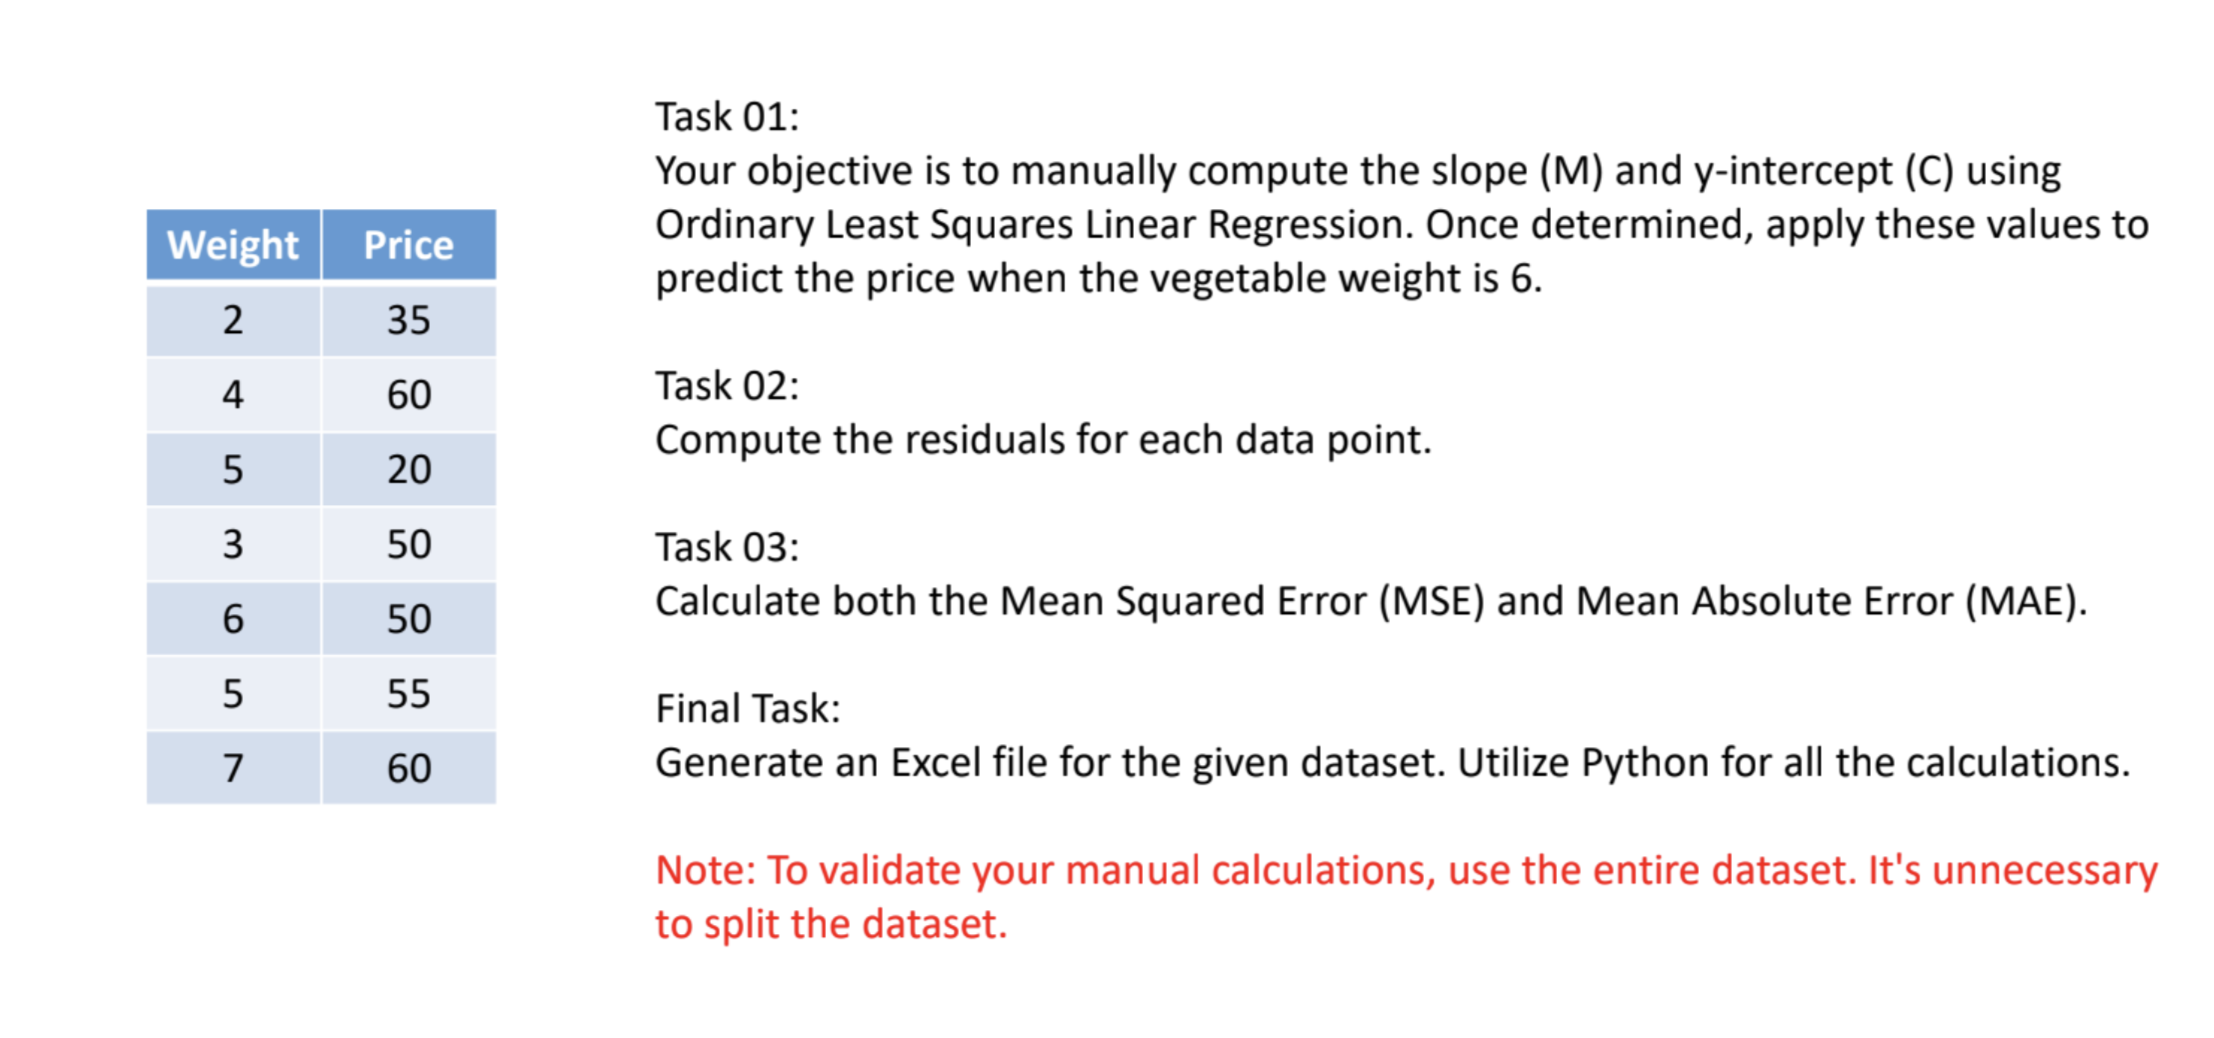

<img src="linearRegretion.jpeg" style ="width:800px;height:600px;"/>


In [273]:
#!pip install libraryname

In [274]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [275]:
df = pd.read_excel("LinearRegretion.xlsx")
df.head()

,Weight(x),Price(y)
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [276]:
df.shape # row,col

(7, 2)

In [277]:
df.head(7)

,Weight(x),Price(y)
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [278]:
df.tail(2)

,Weight(x),Price(y)
5,5,55
6,7,60


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Weight(x)  7 non-null      int64
 1   Price(y)   7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [280]:
df.isnull().sum()

Weight(x)    0
Price(y)     0
dtype: int64

In [281]:
df[['Weight(x)']].head()

,Weight(x)
0,2
1,4
2,5
3,3
4,6


In [282]:
df[['Price(y)']].head(2)

,Price(y)
0,35
1,60


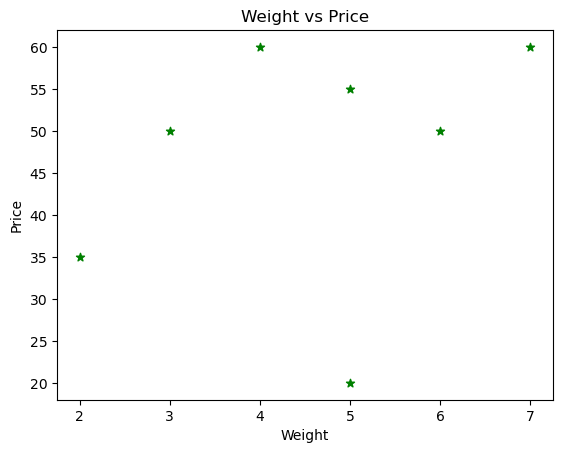

In [283]:
plt.scatter(df['Weight(x)'],df['Price(y)'],color='green',marker='*')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight vs Price')
plt.savefig('name.png')

# <h5>describe() method in pandas is used to generate descriptive statistics of a DataFrame.

In [284]:
basic_stats = df.describe() #descriptive statistics
basic_stats

,Weight(x),Price(y)
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [285]:
correlation = df.corr()
correlation
data=df

# <h5>The correlation between Weight(x) and Weight(x) (which is always 1) indicates perfect positive correlation.
  <h5> The correlation between Weight(x) and Price(y) is 0.306795, indicating a Weak correlation.
  <h5> 0 to 0.19: Very weak correlation
  <h5> 0.2 to 0.39: Weak correlation
  <h5> 0.4 to 0.59: Moderate correlation
  <h5> 0.6 to 0.79: Strong correlation
  <h5> 0.8 to 1.0: Very strong correlation


<Axes: >

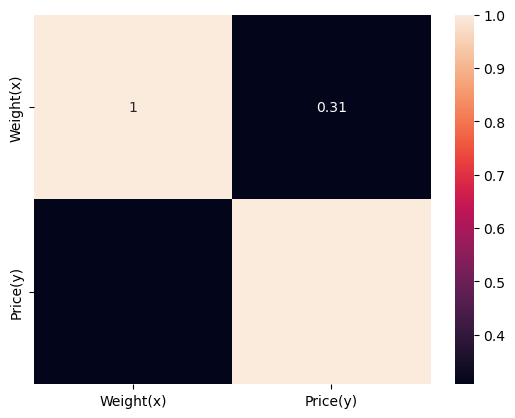

In [286]:
sns.heatmap(correlation, annot=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


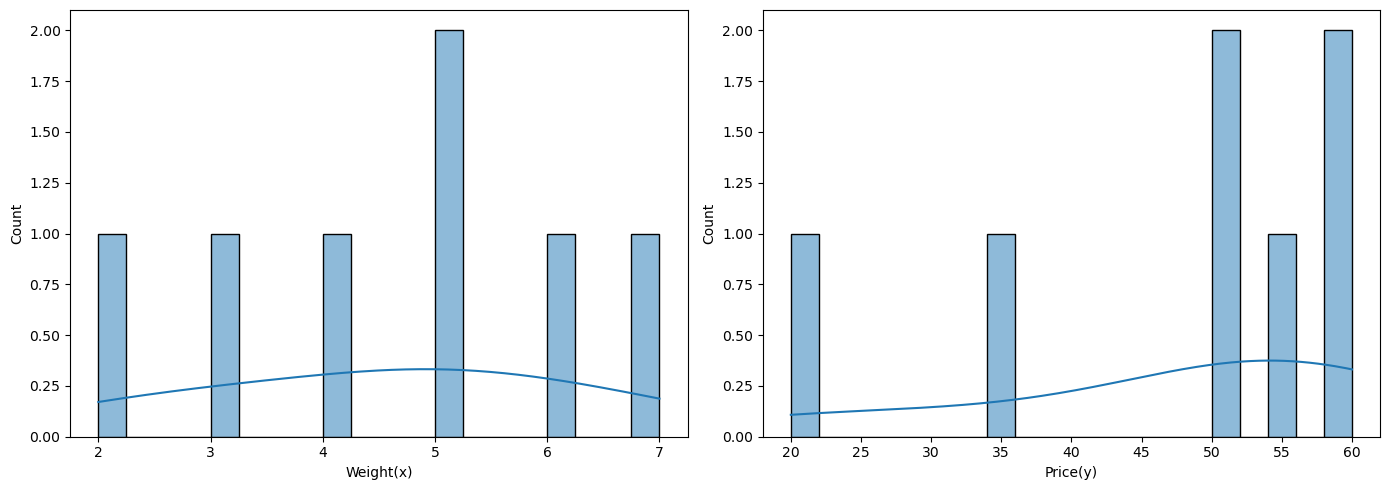

In [287]:
# Histograms for 'Weight' and 'Price'
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Weight(x)'], bins=20, kde=True, ax=ax[0]) #video:
sns.histplot(df['Price(y)'], bins=20, kde=True, ax=ax[1])
plt.tight_layout()

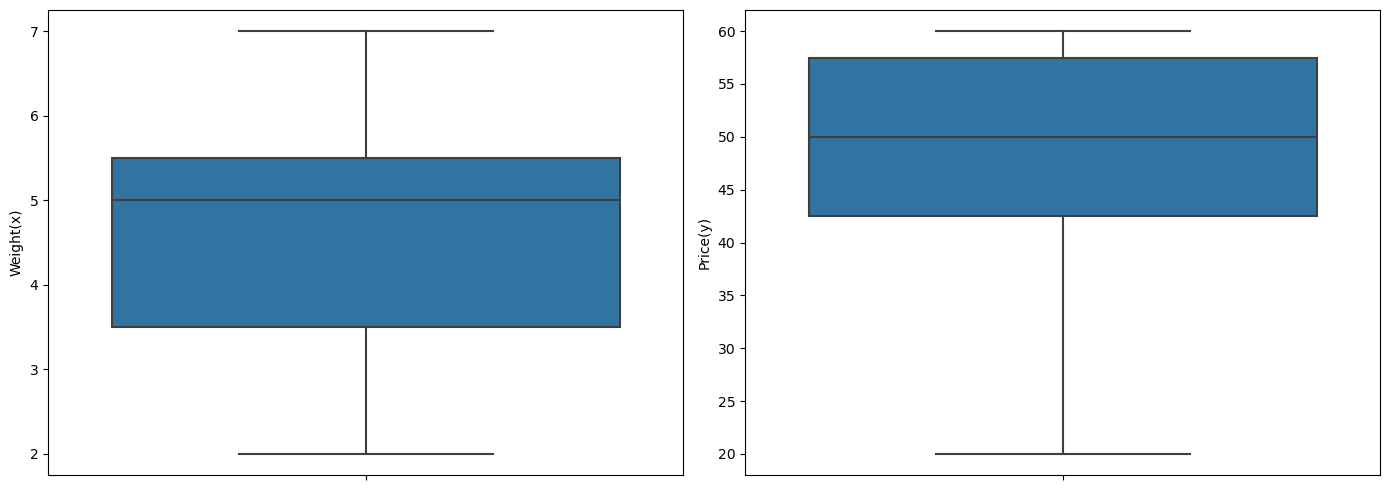

In [288]:
# Boxplots for 'Weight' and 'Price'
fig, bx = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=df['Weight(x)'], ax=bx[0])
sns.boxplot(y=df['Price(y)'], ax=bx[1])
plt.tight_layout()

In [289]:
df.head(7)

,Weight(x),Price(y)
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [290]:
x = df['Weight(x)'] #1d
y = df['Price(y)']

# Linear Regression Step-1

# <h5 > np.mean() is from the NumPy library. NumPy is a fundamental package for scientific computing in Python, and it provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

In [291]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [292]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

# calculate m (slope)

In [293]:
m=np.sum((dev_x)*(dev_y))/np.sum((dev_x)**2)# slope
m

2.620967741935484

# calculate c (coeffecient)

In [294]:
c=mean_y-(m*mean_x)
c

35.16129032258065

# Y= mx + c

# Predict Y (Manually)

In [295]:
x = df['Weight(x)'] #1d
predicted_y = []  # Initialize an empty list to store predicted y values
for i in x:
    predicted_y.append((m * i) + c)
    print("When x =", i, "then Predicted_y =", (m * i) + c)


When x = 2 then Predicted_y = 40.403225806451616
When x = 4 then Predicted_y = 45.645161290322584
When x = 5 then Predicted_y = 48.266129032258064
When x = 3 then Predicted_y = 43.0241935483871
When x = 6 then Predicted_y = 50.88709677419355
When x = 5 then Predicted_y = 48.266129032258064
When x = 7 then Predicted_y = 53.50806451612904


# L1 Loss (Absolute Loss or Mean Absolute Error):
<img src="L1_L2_Loss.png" style ="width:800px;height:600px;"/>


# Mean Absolute Error:

In [304]:
y = df['Price(y)']
for i in y:
    print('Actual y =', i)
#print('predicted_y =',predicted_y,sep=' ', end='\n')
for i in predicted_y:
    print('predicted_y =', i)
    
print("\n Difference between Actual y and the Predicted Y \n")
dif_y_predicted_y =[]

for i in range(min(7, len(y))):
    dif_y_predicted_y.append(y[i]-predicted_y[i])
    print("dif_y_predicted_y[",i,"] =",dif_y_predicted_y[i])

#sum_yi_Y = sum(dif_y_predicted_y)

sum_yi_Y = np.sum (dif_y_predicted_y)
#print(dif_y_predicted_y)
print("Total sum : ",(sum_yi_Y))

Actual y = 35
Actual y = 60
Actual y = 20
Actual y = 50
Actual y = 50
Actual y = 55
Actual y = 60
predicted_y = 40.403225806451616
predicted_y = 45.645161290322584
predicted_y = 48.266129032258064
predicted_y = 43.0241935483871
predicted_y = 50.88709677419355
predicted_y = 48.266129032258064
predicted_y = 53.50806451612904

 Difference between Actual y and the Predicted Y 

dif_y_predicted_y[ 0 ] = -5.403225806451616
dif_y_predicted_y[ 1 ] = 14.354838709677416
dif_y_predicted_y[ 2 ] = -28.266129032258064
dif_y_predicted_y[ 3 ] = 6.975806451612897
dif_y_predicted_y[ 4 ] = -0.8870967741935516
dif_y_predicted_y[ 5 ] = 6.733870967741936
dif_y_predicted_y[ 6 ] = 6.491935483870961
Total sum :  -2.1316282072803006e-14


In [309]:
mean_Absolute_Error=((1/7)* abs(sum_yi_Y))
print("mean_Absolute_Error : ",mean_Absolute_Error)

mean_Absolute_Error :  3.045183153257572e-15


# Mear square Error

In [306]:
print("Difference between Actual y and the Predicted Y and Squire ")
dif_y_predicted_y_squire = (y-predicted_y)**2 

sum_yi_Y_Squire=np.sum(dif_y_predicted_y_squire)
mean_Squire_Error=((1/len(dif_y_predicted_y_squire))* abs(sum_yi_Y_Squire))
print("mean_Squire_Error : ",mean_Squire_Error)

Difference between Actual y and the Predicted Y and Squire 
mean_Squire_Error :  167.30990783410135


# Excel File genarate 

In [307]:
# Create a DataFrame
df = pd.DataFrame({
    'Weight': x,
    'Price': y,
    'Predicted Y': predicted_y,
    'Diffrence between Actual y and the Predicted Y': dif_y_predicted_y,
    'mean_Absolute_Error': mean_Absolute_Error,
    'mean_Squire_Error': mean_Squire_Error,
})

# Specify the file path where you want to save the Excel file
file_path = 'Updated_Linear_Regression.xlsx'

# Write the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print("Excel file generated successfully.")

Excel file generated successfully.


In [308]:
df = pd.read_excel("Updated_Linear_Regression.xlsx")
df.head(7)

,Weight,Price,Predicted Y,Diffrence between Actual y and the Predicted Y,mean_Absolute_Error,mean_Squire_Error
0,2,35,40.403226,-5.403226,3.045183e-15,167.309908
1,4,60,45.645161,14.354839,3.045183e-15,167.309908
2,5,20,48.266129,-28.266129,3.045183e-15,167.309908
3,3,50,43.024194,6.975806,3.045183e-15,167.309908
4,6,50,50.887097,-0.887097,3.045183e-15,167.309908
5,5,55,48.266129,6.733871,3.045183e-15,167.309908
6,7,60,53.508065,6.491935,3.045183e-15,167.309908
